In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [5]:
dataset_path = "C:/Users/ravit/project cycle/Banana"


datagen = ImageDataGenerator(
    rescale=1./255,  
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  
)

In [7]:
train_data = datagen.flow_from_directory(
    dataset_path, target_size=(128, 128), batch_size=32, class_mode='categorical', subset='training'
)


val_data = datagen.flow_from_directory(
    dataset_path, target_size=(128, 128), batch_size=32, class_mode='categorical', subset='validation'
)

Found 2667 images belonging to 3 classes.
Found 666 images belonging to 3 classes.


In [9]:
print(f"Class labels: {train_data.class_indices}")  

Class labels: {'exportQuality': 0, 'freshBanana': 1, 'rottenBanana': 2}


In [11]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  
])


In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
history = model.fit(
    train_data, 
    validation_data=val_data, 
    epochs=20, 
    verbose=1
)


Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 50s 572ms/step - accuracy: 0.5369 - loss: 0.9267 - val_accuracy: 0.6051 - val_loss: 0.6877
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 81s 563ms/step - accuracy: 0.6732 - loss: 0.6372 - val_accuracy: 0.6577 - val_loss: 0.6350
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 81s 555ms/step - accuracy: 0.6824 - loss: 0.5880 - val_accuracy: 0.7252 - val_loss: 0.5704
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 47s 565ms/step - accuracy: 0.6957 - loss: 0.6018 - val_accuracy: 0.6892 - val_loss: 0.5697
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 47s 560ms/step - accuracy: 0.7168 - loss: 0.5488 - val_accuracy: 0.7057 - val_loss: 0.5866
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 47s 558ms/step - accuracy: 0.7525 - loss: 0.5111 - val_accuracy: 0.7012 - val_loss: 0.5816
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 47s 563ms/step - accuracy: 0.7208 - loss: 0.5419 - val_accuracy: 0.7207 - val_loss: 0.5471
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 48s 567ms/step - accuracy: 0.7444 - loss: 0.5136 - val_accu

In [17]:
model.save("banana_classifier.h5")

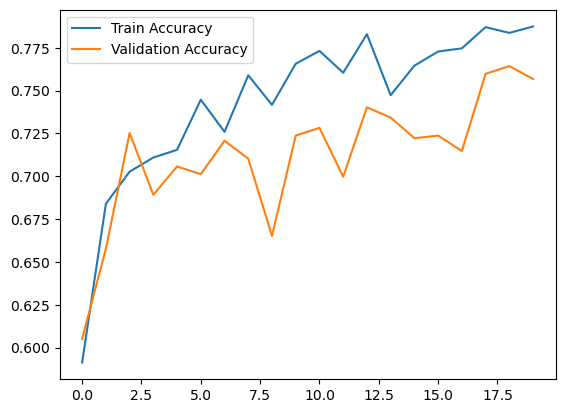

In [19]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
